# Module 1 - Mini Programming Assignment: Comparing Search Algorithm Performance

In this exercise, we will begin to explore computational complexity and explore the differences in various sorting and search algorithms.  We will begin with the base code for sequential/linear and binary search as described in Chapter 1 of Grokking Algorithms (Bhargava 2016).  Example code for the base algorithm is available in the GitHub site for the textbook (please use the iterative solution).

In [199]:
import numpy as np
import random
import time
import timeit
import pandas as pd
import matplotlib.pyplot as plt

### 1) To begin, let's generate some random data to work with. Ensure that a common random number seed is used to generate each of the arrays. We will make five arrays, each of length 512, 1024, 2048, 4096, and 8192 containing randomly generated uniformly distributed integers between 1 to 10000.

In [3]:
# Setting random number seed to ensure consistent results of randomly generated outputs
np.random.seed(123)

In [4]:
array_1 = np.random.randint(0, 10000, 512)
array_2 = np.random.randint(0, 10000, 1024)
array_3 = np.random.randint(0, 10000, 2048)
array_4 = np.random.randint(0, 10000, 4096)
array_5 = np.random.randint(0, 10000, 8192)

In [67]:
arrays = []

for i in range(1,6): # Adding all previously defined arrays into one array for later use
    
    latest_array = eval('array_{}'.format(i))
    
    arrays.append(latest_array) # Equivalent of arrays = [array_1, array_2, array_3, array_4, array_5]

### 2) Time the binary search algorithm on all five lists, noting the sort time and the search time separately. Remember, this algorithm only works on sorted data so you will need to do this before searching. Please use numpy.sort() or sorted() for this. With each execution use the maximum value of the random number array as the number for which you are searching. Please make sure your method of timing is giving accurate enough results for the analysis.

In [21]:
def binary_search(list, item):
    
    # Low and high pointers keep track of which part of the list will be searched
    low = 0
    high = len(list) - 1
    
    while low <= high: # While the search has not been narrowed down to one element
        mid = (low + high) // 2 # Identifying the middle element
        guess = list[mid]
        
        if guess == item: # Found the item
            return mid
        if guess > item: # The guess was too high
            high = mid - 1
        else: # The guess was too low
            low = mid + 1
    return None # The item does not exist in the list

In [213]:
sorting_times = []
sorted_arrays = []

for i in arrays:
    
    start_time = time.perf_counter()
    i = np.sort(i) # sorting array
    end_time = time.perf_counter()
    
    total_time = end_time - start_time # calculating time to sort array
    
    sorting_times.append(total_time)

    sorted_arrays.append(i) # adding sorted array to new sorted array list
    
sorting_times

[5.5900000006658956e-05,
 0.00012539999988803174,
 0.00013649999982590089,
 0.00023590000000695,
 0.0004434000002220273]

In [214]:
binary_search_times = []

for i in sorted_arrays:
    
    start_time = time.perf_counter()
    binary_search(i, i.max()) # performing binary search on the array, searching for max value of each array
    end_time = time.perf_counter()
    
    total_time = end_time - start_time # calculating time to conduct binary search
    
    binary_search_times.append(total_time)
    
binary_search_times

[5.9899999541812576e-05,
 1.3399999261309858e-05,
 9.500000487605575e-06,
 1.1899999663000926e-05,
 0.00014970000029279618]

### 3) Time the linear search algorithm on all five lists. With each execution use the last value of the random number array as the number for which you are searching. Yes we are searching for different values in each algorithm, but we would like to compare worst case scenarios for each.

In [175]:
def linear_search(list, item):
    
    i = 0
    
    while i < len(list):
        if list[i] == item:
            return i
        else:
            i += 1        
    
    return None

In [215]:
linear_search_times = []

for i in arrays:
    
    start_time = time.perf_counter()
    linear_search(i, i[-1]) # performing linear search on the array (not sorted), searching for last value of each array
    end_time = time.perf_counter()
    
    total_time = end_time - start_time # calculating time to conduct linear search
    
    linear_search_times.append(total_time)
    
linear_search_times

[0.00014059999921300914,
 8.510000043315813e-05,
 0.0004360000002634479,
 0.0009304000004703994,
 0.00194889999966108]

### 4) Prepare a five-column table containing each of the following:
- length of the random number array
- sort time
- linear search time
- binary search time
- binary search time plus sort time

In [183]:
# Creating list of original array lengths
array_lengths = []

for i in arrays:
    array_lengths.append(len(i))
    
array_lengths

[512, 1024, 2048, 4096, 8192]

In [216]:
# Creating list of binary search + sort times
binary_and_sort_times = np.array(sorting_times) + np.array(binary_search_times)
binary_and_sort_times = binary_and_sort_times.tolist()

In [217]:
a1_data = {'Array Length': array_lengths
           , 'Sort Time': sorting_times
           , 'Linear Search Time': linear_search_times
           , 'Binary Search Time': binary_search_times
           , 'Binary Search + Sort Time': binary_and_sort_times}

In [218]:
a1_table = pd.DataFrame(a1_data)
a1_table

,Array Length,Sort Time,Linear Search Time,Binary Search Time,Binary Search + Sort Time
0,512,0.000056,0.000141,0.000060,0.000116
1,1024,0.000125,0.000085,0.000013,0.000139
2,2048,0.000136,0.000436,0.000010,0.000146
3,4096,0.000236,0.000930,0.000012,0.000248
4,8192,0.000443,0.001949,0.000150,0.000593


### 5) Use python matplotlib or Seaborn to generate a plot (or series of plots) with the size of the random number array on the horizontal axis and with execution time on the vertical axis. The plot should show execution time against array size for linear and binary search algorithms. Discuss the results.

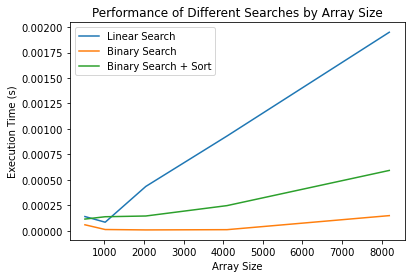

In [222]:
plt.plot(a1_table.iloc[:, 0], a1_table.iloc[:, 2], label = 'Linear Search')
plt.plot(a1_table.iloc[:, 0], a1_table.iloc[:, 3], label = 'Binary Search')
plt.plot(a1_table.iloc[:, 0], a1_table.iloc[:, 4], label = 'Binary Search + Sort')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (s)')
plt.title('Performance of Different Searches by Array Size')
#plt.xticks(a1_table['Array Length'])
plt.legend()
plt.show() # Results discussed in Executive Summary below

## Executive Summary

### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

This exercise has allowed us to compare the performances of both linear and binary search algorithms, and has helped us understand the characteristics and benefits of each appraoch. 5 different lists of randomly generated numbers were created, each doubling in length. The worst-case execution time was captured for both search types on each list.

The results show that binary search scales much better than linear search. While linear search performs about the same (time-wise) up until array size 1,000, its execution quickly outgrows the performance of binary search for arrays with larger lengths. Thus we can conclude that binary search is a more versatile and scalable search algorithm than linear search, as it can adequately handle searching lists of different sizes.

These findings are supported by the readings, wich define the big O notations of linear and binary search as follows:

- Linear Search: O(n)
    - Linear search works by starting at the beginning of a list and searching each element, one at a time, until the requested element has been found or the list is completed. This algorithm is useful to data engineers as a brute-force solution to solving search problems. While it does not scale well (linear time), it is accurate and reliable.


- Binary Search: O(log(n))
    - Binary search works by searching for the requested element in the middle of a list, and then based on if the found result is greater than or less than the needed value will cut half of the list from its search and repeat until the value is found or the list is completed. In this way, binary search can scale to very large lists by continuing to cut the length of the list in half until the desired element is found. This algorithm is useful to data engineers because of how well it scales (logarithmic time) and how simple its code is.